# Statsmodels

The most common package to do regression analysis with is [Statsmodels](https://www.statsmodels.org/stable/index.html)

In [1]:
import statsmodels.api as sm

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + (4 * rng.randn(50))

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              137.1
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                    8.29e-16
Time:                        19:49:38   Log-Likelihood:                         -146.53
No. Observations:                  50   AIC:                                      295.1
Df Residuals:                      49   BIC:                                      297.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3596      0.116     11.709      0.000       1.126       1.593
==============================================================================
Omnibus:                        1.356   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.362
Skew:                           0.326   Prob(JB):                        0.506
Kurtosis:                       2.521   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We'll go over all of these numbers in the next weeks.

See how the model fits:

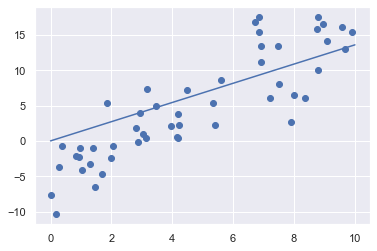

In [2]:
xfit = np.linspace(0, 10, 1000)
yfit = est.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

# Constant term

Note that the intercept is $0$ in our model! This is because statsmodels works on matrices and all inputs, including the intercept, have to be specified.

Matrix regression can be seen as finding $\beta$ such that

$$(\beta \cdot X - y)^2$$

is minimized.

In the case of simple regression without an intercept, $\beta$ is the slope. In simple regression **with an intercept**, $\beta = [intercept, slope]$.

Since this means $\beta$ is $2 \times 1$ then we need the matrix to be $n \times 2$ and the first column to be a constant scale of $\beta[0]$. 

The way we do this is with a column vector of ones. `sm.add_constant` makes this easy.

In [3]:
x = sm.add_constant(x)
x

array([[1.00000000e+00, 4.17022005e+00],
       [1.00000000e+00, 7.20324493e+00],
       [1.00000000e+00, 1.14374817e-03],
       [1.00000000e+00, 3.02332573e+00],
       [1.00000000e+00, 1.46755891e+00],
       [1.00000000e+00, 9.23385948e-01],
       [1.00000000e+00, 1.86260211e+00],
       [1.00000000e+00, 3.45560727e+00],
       [1.00000000e+00, 3.96767474e+00],
       [1.00000000e+00, 5.38816734e+00],
       [1.00000000e+00, 4.19194514e+00],
       [1.00000000e+00, 6.85219500e+00],
       [1.00000000e+00, 2.04452250e+00],
       [1.00000000e+00, 8.78117436e+00],
       [1.00000000e+00, 2.73875932e-01],
       [1.00000000e+00, 6.70467510e+00],
       [1.00000000e+00, 4.17304802e+00],
       [1.00000000e+00, 5.58689828e+00],
       [1.00000000e+00, 1.40386939e+00],
       [1.00000000e+00, 1.98101489e+00],
       [1.00000000e+00, 8.00744569e+00],
       [1.00000000e+00, 9.68261576e+00],
       [1.00000000e+00, 3.13424178e+00],
       [1.00000000e+00, 6.92322616e+00],
       [1.000000

In [4]:
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     151.9
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.75e-16
Time:                        19:49:45   Log-Likelihood:                -135.25
No. Observations:                  50   AIC:                             274.5
Df Residuals:                      48   BIC:                             278.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9943      0.954     -5.232      0.000      -6.913      -3.075
x1             2.1088      0.171     12.326      0.000       1.765       2.453
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.057
Skew:                           0.048   Prob(JB):                        0.972
Kurtosis:                       2.865   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

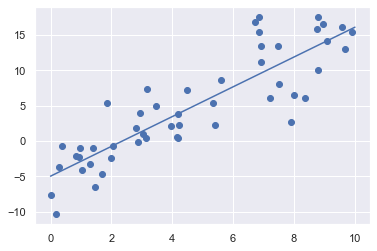

In [5]:
xfit = np.linspace(0, 10, 1000)
yfit = est.predict(sm.add_constant(xfit))

plt.scatter(x[:, 1], y)
plt.plot(xfit, yfit)

# Matrix form regression

We can solve for the procedure for finding $\beta$. You don't need to understand everything here, but we'll quickly run through the procedure. Set up the minimum problem to find $\beta$ that minimizes:

$$ min_\beta (\beta \cdot X - y)^2$$

The first derivative is set to zero to find the minimum point in the equation:

$$ X^T(\beta \cdot X - y) = 0$$

Which gives

$$ X^TX\beta = X^Ty$$

Solving for $\beta$:

$$\beta = (X^TX)^{-1}X^Ty$$

**NOTE:** Ordinary least squares is the only problem where we have a closed solution for $\beta$. We call it the "normal equation" because of it. 

In [9]:
# Returns array with [intercept, slope]
X = x.copy()

#beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([-4.99430834,  2.10883524])

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

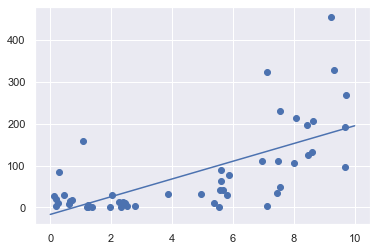

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     39.29
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           9.74e-08
Time:                        19:08:53   Log-Likelihood:                -287.37
No. Observations:                  50   AIC:                             578.7
Df Residuals:                      48   BIC:                             582.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.5728     19.056     -0.870      0.389     -54.887      21.741
x1            21.1411      3.373      6.268      0.000      14.360      27.922
==============================================================================
Omnibus:                       19.862   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.426
Skew:                           1.335   Prob(JB):                     6.72e-07
Kurtosis:                       5.552   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x = 10 * rng.rand(50)
y = np.square(2 * x - 5 + (4 * rng.randn(50)))

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 10, 1000))
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit)
plt.show()

est.summary()

### With Squared Feature

We can add a third term to the matrix

In [26]:
x = sm.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)
x

array([[1.00000000e+00, 9.32595463e+00, 8.69734298e+01],
       [1.00000000e+00, 6.96818161e+00, 4.85555550e+01],
       [1.00000000e+00, 6.60001727e-01, 4.35602280e-01],
       [1.00000000e+00, 7.55463053e+00, 5.70724424e+01],
       [1.00000000e+00, 7.53876188e+00, 5.68329308e+01],
       [1.00000000e+00, 9.23024536e+00, 8.51974293e+01],
       [1.00000000e+00, 7.11524759e+00, 5.06267482e+01],
       [1.00000000e+00, 1.24270962e+00, 1.54432720e+00],
       [1.00000000e+00, 1.98801338e-01, 3.95219721e-02],
       [1.00000000e+00, 2.62109869e-01, 6.87015833e-02],
       [1.00000000e+00, 2.83064880e-01, 8.01257264e-02],
       [1.00000000e+00, 2.46211068e+00, 6.06198898e+00],
       [1.00000000e+00, 8.60027949e+00, 7.39648073e+01],
       [1.00000000e+00, 5.38831064e+00, 2.90338916e+01],
       [1.00000000e+00, 5.52821979e+00, 3.05612140e+01],
       [1.00000000e+00, 8.42030892e+00, 7.09016024e+01],
       [1.00000000e+00, 1.24173315e+00, 1.54190122e+00],
       [1.00000000e+00, 2.79183

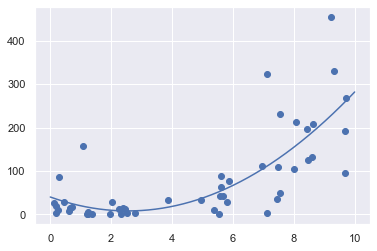

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     32.52
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.36e-09
Time:                        19:08:53   Log-Likelihood:                -280.60
No. Observations:                  50   AIC:                             567.2
Df Residuals:                      47   BIC:                             572.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0816     22.420      1.788      0.080      -5.021      85.184
x1           -25.1428     12.470     -2.016      0.050     -50.230      -0.055
x2             4.9311      1.290      3.822      0.000       2.336       7.527
==============================================================================
Omnibus:                       21.411   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.295
Skew:                           1.257   Prob(JB):                     2.93e-09
Kurtosis:                       6.542   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 10, 1000))
xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit)
plt.show()

est.summary()

If we add $x$ and $x^2$ to the model, we fit the **best parabola** instead of the **best line** to the data

In [28]:
x = np.concatenate([x, (x[:,1] ** 3)[:, np.newaxis]], axis=1)
x

array([[1.00000000e+00, 9.32595463e+00, 8.69734298e+01, 8.11110260e+02],
       [1.00000000e+00, 6.96818161e+00, 4.85555550e+01, 3.38343926e+02],
       [1.00000000e+00, 6.60001727e-01, 4.35602280e-01, 2.87498257e-01],
       [1.00000000e+00, 7.55463053e+00, 5.70724424e+01, 4.31161215e+02],
       [1.00000000e+00, 7.53876188e+00, 5.68329308e+01, 4.28449932e+02],
       [1.00000000e+00, 9.23024536e+00, 8.51974293e+01, 7.86393176e+02],
       [1.00000000e+00, 7.11524759e+00, 5.06267482e+01, 3.60221848e+02],
       [1.00000000e+00, 1.24270962e+00, 1.54432720e+00, 1.91915027e+00],
       [1.00000000e+00, 1.98801338e-01, 3.95219721e-02, 7.85702096e-03],
       [1.00000000e+00, 2.62109869e-01, 6.87015833e-02, 1.80073630e-02],
       [1.00000000e+00, 2.83064880e-01, 8.01257264e-02, 2.26807791e-02],
       [1.00000000e+00, 2.46211068e+00, 6.06198898e+00, 1.49252878e+01],
       [1.00000000e+00, 8.60027949e+00, 7.39648073e+01, 6.36118015e+02],
       [1.00000000e+00, 5.38831064e+00, 2.90338916e

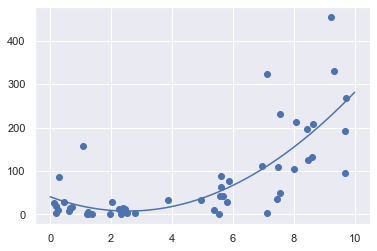

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     21.22
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           8.93e-09
Time:                        19:08:53   Log-Likelihood:                -280.60
No. Observations:                  50   AIC:                             569.2
Df Residuals:                      46   BIC:                             576.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5041     29.482      1.374      0.176     -18.840      99.848
x1           -25.7808     31.147     -0.828      0.412     -88.476      36.914
x2             5.0964      7.492      0.680      0.500      -9.984      20.177
x3            -0.0111      0.498     -0.022      0.982      -1.013       0.990
==============================================================================
Omnibus:                       21.398   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.210
Skew:                           1.257   Prob(JB):                     3.06e-09
Kurtosis:                       6.536   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 10, 1000))
xfit = np.concatenate([
    xfit, 
    np.square(xfit[:,1])[:, np.newaxis],
    (xfit[:,1] ** 3)[:, np.newaxis]
    ], axis=1
)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit)
plt.show()

est.summary()

# Reading P-Values in a regression table

Adding a cube feature doesn't seem to do anything (see the coefficient value is very close to 0). The adjusted $R^2$ (which indicates how well the model fits to data) even went down.

The $P > |t|$ column is a **t-test** result for the null hypothesis on this coefficient. We see in the squared regression, most coefficients pass the t-test, but now they all seem to fail it (so all the coefficients are not significantly differeent than 0 anymore)

All of this indicates the previous model was better (we'll dive into those topics next lecture).